# ANN & MNIST
---

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
id=0

id = 2672
다음 그림은 숫자 8 입니다.


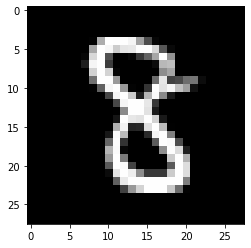

In [14]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
#id += 1

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

In [ ]:
train_x.shape

(60000, 784)

* min-max scaling

In [ ]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [ ]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

In [ ]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
len_y = len(set(train_y))

In [ ]:
train_y.shape

(60000,)

In [ ]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [ ]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [ ]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',    # 관측대상
                   min_delta=0,           # threshold = 학습판단, val 성능(loss)이 min_delta만큼 떨어져야 학습이 되었다 판단
                   patience=5,            # 성능이 개선되지 않더라도 참는 횟수(epochs)
                   #verbose=1,             # 얼리스톱핑이 적용되는 위치를 알려주는 것
                   restore_best_weights=True) # 관측대상의 성능이 좋았던 때의 모델 사용 True

In [ ]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.1330 - val_accuracy: 0.9713
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.1154 - val_accuracy: 0.9762
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0197 - accuracy: 0.9945 - val_loss: 0.1104 - val_accuracy: 0.9787
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.1168 - val_accuracy: 0.9761
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.1226 - val_accuracy: 0.9768
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0185 - accuracy: 0.9948 - val_loss: 0.1112 - val_accuracy: 0.9797
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.1428 - val_accu

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 93.46%
테스트 정확도 : 92.85%


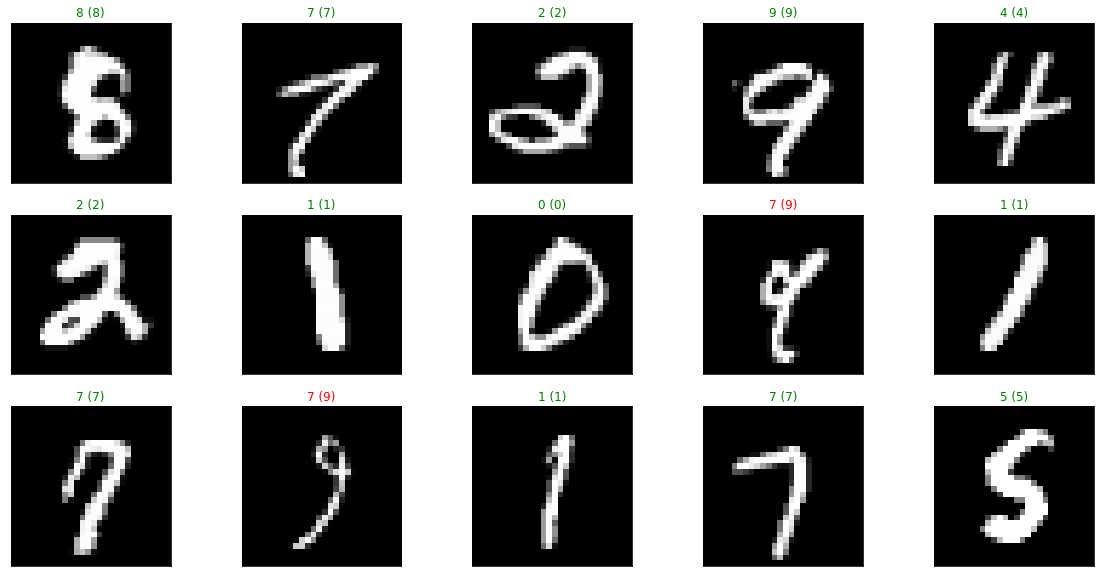

In [ ]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 8308
다음 그림은 숫자 3 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 0.  0.  0. 36.  0. 50.  0.  0. 12.  0.]
틀렸어요


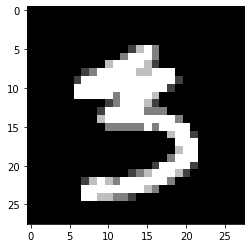

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 1ms/step - loss: 0.2652 - accuracy: 0.9285


[0.2652226388454437, 0.9284999966621399]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [ ]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2258 - accuracy: 0.9315 - val_loss: 0.1352 - val_accuracy: 0.9588
Epoch 2/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0992 - accuracy: 0.9690 - val_loss: 0.1094 - val_accuracy: 0.9682
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0694 - accuracy: 0.9790 - val_loss: 0.0988 - val_accuracy: 0.9711
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0968 - val_accuracy: 0.9732
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0461 - accuracy: 0.9857 - val_loss: 0.1040 - val_accuracy: 0.9730
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.1040 - val_accuracy: 0.9730
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.1191 - val_ac

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 99.19%
테스트 정확도 : 97.91%


In [ ]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)